In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
msv = 2151264665
col = msv%12 + 1 

In [ ]:
data = pd.read_csv('./data/Gia SMP va SMPcap 2021(Giá thị trường SMP).csv',encoding = "ISO-8859-1", delimiter=';') 

In [ ]:
data.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [ ]:
X = data[['6']]

Elbow Method to determine the number of clusters to be formed:


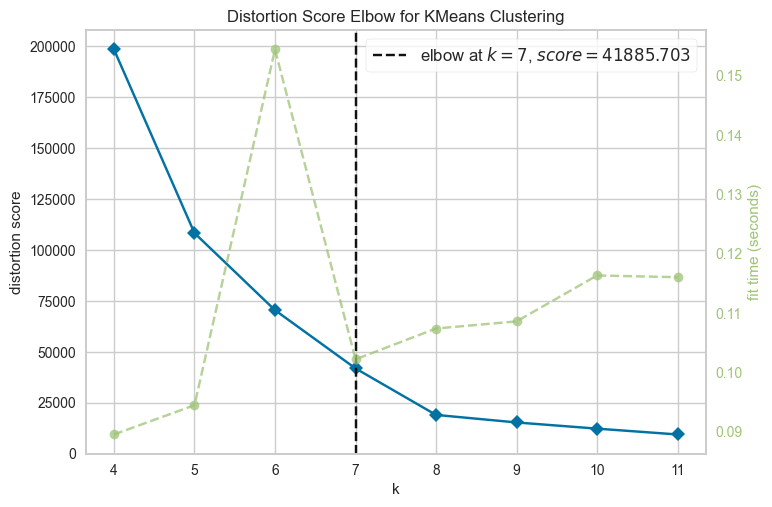

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(random_state=23, n_init=10), k=(4,12))
Elbow_M.fit(X)
Elbow_M.show()

# Thực hiện Model


* Gaussian Mixture Model

In [ ]:
BGM = BayesianGaussianMixture(n_components=8,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(data)



* KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10) # Số clusters có thể điều chỉnh
kmeans.fit(X.values.reshape(-1, 1))
kmeans_labels = kmeans.predict(X.values.reshape(-1, 1))


* DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5) # Tham số có thể điều chỉnh
dbscan_labels = dbscan.fit_predict(selected_data.values.reshape(-1, 1))

In [ ]:
# In ra kết quả của mỗi mô hình
print("Gaussian Mixture Model labels:")
print(gmm_labels)
print("\nKMeans labels:")
print(kmeans_labels)
print("\nDBSCAN labels:")
print(dbscan_labels)

# Mô tả kịch bản tách dữ liệu
print("\nKịch bản tách data:")
print("Dữ liệu được đọc từ tệp CSV 'Gia SMP va SMPcap 2021(Giá thị trường SMP).csv'.")
print(f"Chọn cột số {col} để phân tích.")
print("Sử dụng Gaussian Mixture Model với số components là 2, KMeans clustering với số clusters là 2, và DBSCAN để phân tích dữ liệu.")

Gaussian Mixture Model labels:
[5 5 1 1 2 2 2 2 2 5 1 2 2 2 2 2 1 2 2 2 2 2 5 1 1 1 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 5 1 5 1 1 1 1 5 1 5 5 2 1 1 5 1
 2 2 2 2 2 5 6 6 6 2 2 2 5 1 2 6 1 1 1 5 1 2 2 2 6 5 5 5 2 2 2 2 2 6 2 2 2
 2 2 2 5 2 2 2 2 5 5 5 2 2 2 6 1 1 5 6 2 2 2 2 2 6 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 2 1 1 1 1 5 5 6 2 2 2 2 1 1 1 5 6 6 2 2 1 5 1 6 2 2 2 5 5 5 1 5 5 5 5
 1 2 5 1 6 6 5 5 1 1 2 2 2 5 2 3 4 3 4 3 5 3 0 0 2 1 5 5 1 2 2 2 2 2 1 2 3
 3 3 3 3 3 4 4 3 3 3 0 2 2 0 0 2 2 1 5 1 6 6 5 6 2 6 2 2 2 2 0 2 5 2 2 6 1
 6 1 5 1 6 6 6 1 5 5 5 1 6 1 6 1 5 1 6 5 6 2 6 5 6 2 2 2 1 1 5 1 2 2 2 2 1
 5 1 6 6 1 1 1 5 1 2 1 6 1 1 5 1 1 2 2 2 1 5 2 2 2 2 2 2 5 6 2 1 6 1 5 5 5
 1 1 6 1 1 5 1 1 6 2 2 6 5 6 2 2 2 2 6 1 5 2 6 6 6 1 5 1 1 2 6 6]

KMeans labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
pp=BGM.predict_proba(X)# Calcualting the probabilities of each prediction
df_new=pd.DataFrame(X) 
df_new[[f'predict_proba_{i}' for i in range(8)]]=pp # creating new dataframe columns of probabilites 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(8):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.68)].index
    train_index = np.concatenate((train_index, n_inx))

ValueError: Columns must be same length as key

In [ ]:
#ricopue's notebook's code snippet
from sklearn.model_selection import StratifiedKFold
X_new=df_new.loc[train_index]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(11)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx])
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx])
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

KeyError: 'preds'